# Programming for Biologists - Final
## Kaushik Raman
### Predicting Lung cancer

1. Load the file into your Python environment (5pts)

In [57]:
import pandas as pd
data = pd.read_csv("mini survey lung cancer.csv", sep=",")
data

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,2,2,2,YES
1,M,74,2,1,2,1,2,2,YES
2,F,59,1,1,1,1,2,2,NO
3,M,63,2,2,1,2,1,2,NO
4,F,63,1,1,1,1,2,1,NO
...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,2,2,2,1,YES
305,M,70,2,1,1,2,2,2,YES
306,M,58,2,1,1,2,1,2,YES
307,M,67,2,2,1,2,2,2,YES


2. For the variables with the 2/1 scores, replace all the 2 with a Yes and 1 with a No.(15pts)

In [58]:
data = data.replace(to_replace=[1,2], value=["No","Yes"])
data

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,No,Yes,Yes,Yes,YES
1,M,74,Yes,No,Yes,No,Yes,Yes,YES
2,F,59,No,No,No,No,Yes,Yes,NO
3,M,63,Yes,Yes,No,Yes,No,Yes,NO
4,F,63,No,No,No,No,Yes,No,NO
...,...,...,...,...,...,...,...,...,...
304,F,56,No,No,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,Yes,Yes,Yes,YES
306,M,58,Yes,No,No,Yes,No,Yes,YES
307,M,67,Yes,Yes,No,Yes,Yes,Yes,YES


3. Let’s categorize the AGE group as well. For all individuals less than 65 years old, assign them as “Middle” and all individuals greater than or equal to 65 as “Old”. (20pts)

In [60]:
data

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,No,Yes,Yes,Yes,YES
1,M,74,Yes,No,Yes,No,Yes,Yes,YES
2,F,59,No,No,No,No,Yes,Yes,NO
3,M,63,Yes,Yes,No,Yes,No,Yes,NO
4,F,63,No,No,No,No,Yes,No,NO
...,...,...,...,...,...,...,...,...,...
304,F,56,No,No,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,Yes,Yes,Yes,YES
306,M,58,Yes,No,No,Yes,No,Yes,YES
307,M,67,Yes,Yes,No,Yes,Yes,Yes,YES


In [67]:
import numpy as np
data['AGE'] = np.where((data['AGE'] <=65) , "Middle","Old")

In [68]:
data

,GENDER,AGE,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,Old,No,Yes,No,Yes,Yes,Yes,YES
1,M,Old,Yes,No,Yes,No,Yes,Yes,YES
2,F,Middle,No,No,No,No,Yes,Yes,NO
3,M,Middle,Yes,Yes,No,Yes,No,Yes,NO
4,F,Middle,No,No,No,No,Yes,No,NO
...,...,...,...,...,...,...,...,...,...
304,F,Middle,No,No,Yes,Yes,Yes,No,YES
305,M,Old,Yes,No,No,Yes,Yes,Yes,YES
306,M,Middle,Yes,No,No,Yes,No,Yes,YES
307,M,Old,Yes,Yes,No,Yes,Yes,Yes,YES


4. Use a bar plot to show whether smokers have a higher probability of getting cancer.
a. Do the same for alcohol drinking (20pts)

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='Count'>

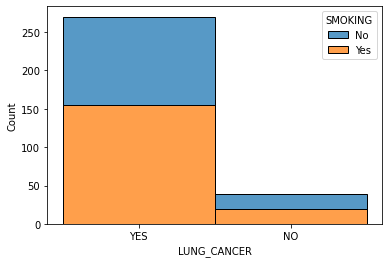

In [86]:
import seaborn as sns
sns.histplot(data=data,x='LUNG_CANCER', hue="SMOKING", multiple = "stack")

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='Count'>

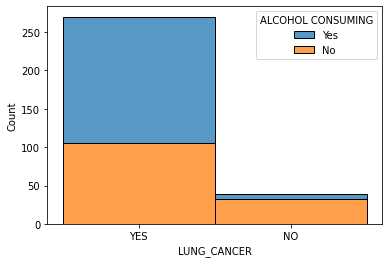

In [87]:
sns.histplot(data=data,x='LUNG_CANCER', hue="ALCOHOL CONSUMING", multiple='stack')

5. Randomly split the data into 20% testing and 80% training.(10pts)

In [88]:
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [100]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.LUNG_CANCER)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

6. Perform 5x cross validation on training ONLY.(10pts)

In [115]:
one_hot_data = pd.get_dummies(data,drop_first=True)
one_hot_data

,GENDER_M,AGE_Old,SMOKING_Yes,ANXIETY_Yes,CHRONIC DISEASE_Yes,ALCOHOL CONSUMING_Yes,SHORTNESS OF BREATH_Yes,CHEST PAIN_Yes,LUNG_CANCER_YES
0,1,1,0,1,0,1,1,1,1
1,1,1,1,0,1,0,1,1,1
2,0,0,0,0,0,0,1,1,0
3,1,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,1,1,1,0,1
305,1,1,1,0,0,1,1,1,1
306,1,0,1,0,0,1,0,1,1
307,1,1,1,1,0,1,1,1,1


In [116]:
indp = np.array(one_hot_data.iloc[:,:-1])
dpd = np.array(one_hot_data.LUNG_CANCER_YES)

In [117]:
tree = DecisionTreeClassifier()
clf = tree.fit(one_hot_data, data['LUNG_CANCER'])

In [118]:
Indp_train, Indp_test, Dpd_train, Dpd_test = train_test_split(indp, dpd, test_size=0.2)

In [126]:
fitmodel = clf.fit(Indp_train,Dpd_train)

In [125]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, Indp_train, Dpd_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8        0.8        0.93877551 0.7755102  0.91836735]
Average CV Score:  0.8465306122448981
Number of CV Scores used in Average:  5


7. Test your model on the 20% test data.(10pts)

In [124]:
results = fitmodel.predict(Indp_test)
confusion_matrix(results, Dpd_test)
fitmodel.score(Indp_test,Dpd_test)

0.7741935483870968

8. Compare and discuss the results from cross validation and the your final test. How
confident are you that it will correctly predict new data? (10pts)

The results from the final test gives a score/accuracy of 77.41% whereas the results from 5fold cross validation gives a score/accurary of 84.65%. So given the big difference of 7% in error rates between the two different trails, I would say that the model would correctly predict data with an accuracy of 80%. So I would say that I am 80% confident that the model would predict new data correctly. 